# Building machine learning model for spam classifier for text message

### load all the required libraries

In [17]:
import numpy as np
import pandas as pd
import re
import spacy as sp
import nltk as nl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer # for creating BOW
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from spacy.lang.en.stop_words import STOP_WORDS


### load english model for spacy

In [6]:
nlp = sp.load("en_core_web_sm")

### read the raw data

In [53]:
df = pd.read_csv("SMSSpamCollection.txt",sep="\t",names=["label","message"])
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.shape

(5572, 2)

In [55]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

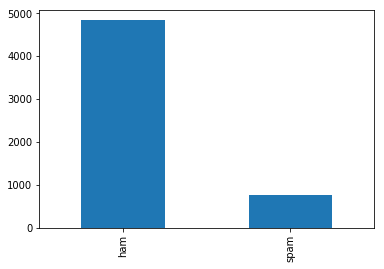

In [56]:
df.label.value_counts().plot(kind='bar')
plt.show()

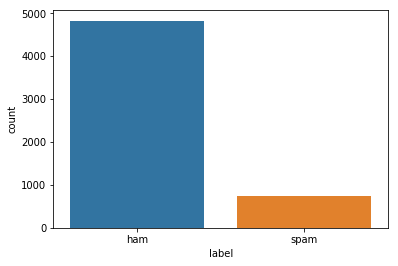

In [57]:
sns.countplot(df.label)
plt.show()

###### rename ham as 0 and spam as 1

In [58]:
df.label.replace({"ham":0,"spam":1},inplace=True)

### Analyze the data

In [59]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
for i in range(10):
    print(df.message[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

### Perform preprocessing on raw data and apply function over message
- make lower
- remove special chars
- create nlp object
- remove stop words and punctuation using list comprehension
- remove spaces again
- convert to sentence again by joining the words
- Remove bigger spaces which got created after joining
- return the clean sentence


In [61]:
df.head(2)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [50]:
def cleanTheMessage(text):
    msg = text.lower()
    msg = re.sub("[^a-z]+"," ",msg)
    msg = re.sub("[\s+]"," ",msg)
#     print(msg)
    return(msg)
# print(df.message[200])
# print("#"*10)
# cleanTheMessage(df.message[200])

In [65]:
df.message = df.message.apply(cleanTheMessage)

In [68]:
for i in range(10):
    print(df.message[i])

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat 
ok lar joking wif u oni 
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say 
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent 
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only 
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 


### Label 0/1 on label column

In [40]:
# df.label.replace({"ham":0,"spam":1},inplace=True)

### Create train and test data

In [69]:
X = df.message
y = df.label

In [113]:
# X_train = df.message[:-80]

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=6)

In [81]:
X_train.shape

(4457,)

In [83]:
# X_train

In [73]:
X_test.shape

(1115,)

In [75]:
y_train.shape

(4457,)

In [74]:
y_test.shape

(1115,)

### Create BOW (bag of words) using Count Vectorizer

In [84]:
cv = CountVectorizer()

In [85]:
dtm = cv.fit_transform(X_train)

In [89]:
X_t_dtma = dtm.toarray()
X_t_dtma

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
X_t_dtma.shape

(4457, 6910)

### Create MultinomialNB() instance for training and testing
> https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

In [88]:
nb = MultinomialNB()

In [91]:
nb.fit(X_t_dtma,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict the labels on test data

In [93]:
x_test_dtm = cv.transform(X_test)
x_test_dtma = x_test_dtm.toarray()

In [95]:
y_pred = nb.predict(x_test_dtma)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [97]:
accuracy_score(y_test,y_pred)*100

99.01345291479821

### Confusion matrix

In [105]:
nb.classes_

array([0, 1])

In [106]:
cm = confusion_matrix(y_test,y_pred,labels=nb.classes_)
cm

array([[976,   4],
       [  7, 128]])

### Visualize confusion matrix using heatmap

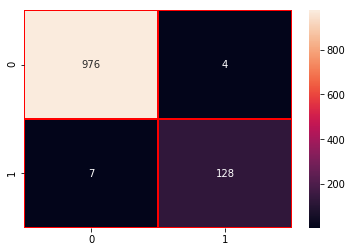

In [112]:
sns.heatmap(cm,annot=True,fmt="d",linecolor="r",linewidths=1)

### Accuracy score

### Create BOW (bag of words) using tfidf-Vectorizer

### Serializing/De-serializing the model

In [114]:
from joblib import dump,load

In [115]:
dump(nb,"nb.joblib")

['nb.joblib']

In [116]:
mod = load("nb.joblib")

In [118]:
y_pred = mod.predict(x_test_dtma)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [120]:
confusion_matrix(y_test,y_pred)

array([[976,   4],
       [  7, 128]])

In [121]:
test_dtma = cv.transform(["This is learnbay we are learning NLP"])

In [123]:
mod.predict(test_dtma)[0]

0